In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
path = '/Users/ibrahimihab/Downloads/Estimates-on-the-use-of-water-(2020)-a-3712 - Estimates-on-the-use-of-water-(2020)-a-3712.csv'

df =pd.read_csv(path)

In [3]:
df.shape

(215, 18)

In [4]:
df.head()

,name,income_group,pop_n,pop_u,wat_bas_n,wat_lim_n,wat_unimp_n,wat_sur_n,wat_bas_r,wat_lim_r,wat_unimp_r,wat_sur_r,wat_bas_u,wat_lim_u,wat_unimp_u,wat_sur_u,value_cnt,pop_u_val
0,Tokelau,NAN,1.350,0.000000,99.70767665,0,0.2923233459,0,99.70767665,0,0.2923233459,0,NAN,NAN,NAN,NAN,16.0,0.000000e+00
1,Niue,NAN,1.618,46.202003,97.01087618,0,2.989123822,0,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,16.0,3.597609e+06
2,Falkland Islands (Malvinas),NAN,3.483,78.507996,95.3089274,0,4.691072596,0,78.17294282,0,21.82705718,0,100,0,0,0,16.0,6.113178e+06
3,Montserrat,NAN,4.999,9.115000,98.07748262,0,1.922517378,0,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,16.0,7.097572e+05
4,Saint Pierre and Miquelon,NAN,5.795,89.961998,91.4,0,8.6,0,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,16.0,7.005066e+06


In [5]:
df.columns

Index(['name', 'income_group', 'pop_n', 'pop_u', 'wat_bas_n', 'wat_lim_n',
       'wat_unimp_n', 'wat_sur_n', 'wat_bas_r', 'wat_lim_r', 'wat_unimp_r',
       'wat_sur_r', 'wat_bas_u', 'wat_lim_u', 'wat_unimp_u', 'wat_sur_u',
       'value_cnt', 'pop_u_val'],
      dtype='object')

In [6]:
df.dtypes

name             object
income_group     object
pop_n           float64
pop_u           float64
wat_bas_n        object
wat_lim_n        object
wat_unimp_n      object
wat_sur_n        object
wat_bas_r        object
wat_lim_r        object
wat_unimp_r      object
wat_sur_r        object
wat_bas_u        object
wat_lim_u        object
wat_unimp_u      object
wat_sur_u        object
value_cnt       float64
pop_u_val       float64
dtype: object

In [7]:
df.describe()

,pop_n,pop_u,value_cnt,pop_u_val
count,2.140000e+02,213.000000,213.000000,2.150000e+02
mean,7.277285e+04,61.938324,15.976526,9.556168e+06
std,5.485779e+05,24.693940,0.151761,6.976011e+07
min,1.350000e+00,0.000000,15.000000,0.000000e+00
25%,8.137463e+02,42.923000,16.000000,3.339402e+06
50%,6.909866e+03,63.531998,16.000000,4.947043e+06
75%,2.622841e+04,81.562004,16.000000,6.389061e+06
max,7.786695e+06,100.000000,16.000000,1.027288e+09


## Data Prep

In [8]:
df.loc[df.duplicated()]

,name,income_group,pop_n,pop_u,wat_bas_n,wat_lim_n,wat_unimp_n,wat_sur_n,wat_bas_r,wat_lim_r,wat_unimp_r,wat_sur_r,wat_bas_u,wat_lim_u,wat_unimp_u,wat_sur_u,value_cnt,pop_u_val


In [9]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(f"Unique values in '{column_name}':")
    print(df[column_name].unique())

Unique values in 'name':
['Tokelau' 'Niue' 'Falkland Islands (Malvinas)' 'Montserrat'
 'Saint Pierre and Miquelon' 'Saint Helena' 'Saint Barthelemy' 'Nauru'
 'Wallis and Futuna Islands' 'Tuvalu' 'Cook Islands' 'Palau'
 'British Virgin Islands' 'Gibraltar' 'San Marino' 'Liechtenstein'
 'Saint Martin (French part)' 'Monaco' 'Faeroe Islands' 'American Samoa'
 'Greenland' 'Northern Mariana Islands' 'Marshall Islands' 'Bermuda'
 'Andorra' 'Isle of Man' 'United States Virgin Islands' 'Tonga' 'Kiribati'
 'Guam' 'Saint Lucia' 'Samoa' 'Sao Tome and Principe' 'Mayotte'
 'French Polynesia' 'New Caledonia' 'Barbados' 'French Guiana' 'Vanuatu'
 'Iceland' 'Martinique' 'Belize' 'Guadeloupe' 'Brunei Darussalam' 'Malta'
 'Maldives' 'Cabo Verde' 'Suriname' 'Luxembourg' 'Montenegro'
 'China, Macao SAR' 'Solomon Islands' 'Bhutan' 'Guyana' 'Réunion' 'Fiji'
 'Djibouti' 'Eswatini' 'Cyprus' 'Mauritius' 'Timor-Leste' 'Estonia'
 'Trinidad and Tobago' 'Bahrain' 'Latvia' 'Guinea-Bissau' 'Slovenia'
 'North Macedon

In [10]:
df.isna().sum()

name            2
income_group    2
pop_n           1
pop_u           2
wat_bas_n       2
wat_lim_n       2
wat_unimp_n     2
wat_sur_n       2
wat_bas_r       2
wat_lim_r       2
wat_unimp_r     2
wat_sur_r       2
wat_bas_u       2
wat_lim_u       2
wat_unimp_u     2
wat_sur_u       7
value_cnt       2
pop_u_val       0
dtype: int64

In [11]:
df_cleaned = df.dropna()

In [12]:
column_list = df_cleaned.columns.values.tolist()
for column_name in column_list:
    print(f"Unique values in '{column_name}':")
    print(df_cleaned[column_name].unique())

Unique values in 'name':
['Tokelau' 'Niue' 'Falkland Islands (Malvinas)' 'Montserrat'
 'Saint Pierre and Miquelon' 'Saint Helena' 'Saint Barthelemy' 'Nauru'
 'Wallis and Futuna Islands' 'Tuvalu' 'Cook Islands' 'Palau'
 'British Virgin Islands' 'Gibraltar' 'San Marino' 'Liechtenstein'
 'Saint Martin (French part)' 'Monaco' 'Faeroe Islands' 'American Samoa'
 'Greenland' 'Northern Mariana Islands' 'Bermuda' 'Andorra' 'Isle of Man'
 'United States Virgin Islands' 'Kiribati' 'Guam' 'Saint Lucia' 'Samoa'
 'Sao Tome and Principe' 'Mayotte' 'French Polynesia' 'New Caledonia'
 'Barbados' 'French Guiana' 'Vanuatu' 'Iceland' 'Martinique' 'Belize'
 'Guadeloupe' 'Brunei Darussalam' 'Malta' 'Maldives' 'Suriname'
 'Luxembourg' 'Montenegro' 'China, Macao SAR' 'Solomon Islands' 'Bhutan'
 'Guyana' 'Réunion' 'Fiji' 'Djibouti' 'Eswatini' 'Cyprus' 'Mauritius'
 'Timor-Leste' 'Estonia' 'Trinidad and Tobago' 'Bahrain' 'Latvia'
 'Guinea-Bissau' 'Slovenia' 'North Macedonia' 'Lesotho' 'Gabon' 'Botswana'
 'Gambia

There is still nan values

In [13]:
df_cleaned.replace(['nan', 'NAN'], np.nan, inplace=True)

# Step 2: Now dropna() will work
df_cleaned.dropna(inplace=True)


/var/folders/5h/mq3pb8815tj3_96zcfdhzh500000gn/T/ipykernel_26708/1097372948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace(['nan', 'NAN'], np.nan, inplace=True)
/var/folders/5h/mq3pb8815tj3_96zcfdhzh500000gn/T/ipykernel_26708/1097372948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


In [14]:
column_list = df_cleaned.columns.values.tolist()
for column_name in column_list:
    print(f"Unique values in '{column_name}':")
    print(df_cleaned[column_name].unique())

Unique values in 'name':
['Tuvalu' 'Palau' 'Greenland' 'Andorra' 'Kiribati' 'Saint Lucia' 'Samoa'
 'Sao Tome and Principe' 'Vanuatu' 'Iceland' 'Belize' 'Malta' 'Maldives'
 'Suriname' 'Luxembourg' 'Montenegro' 'Solomon Islands' 'Bhutan' 'Guyana'
 'Fiji' 'Djibouti' 'Eswatini' 'Cyprus' 'Mauritius' 'Timor-Leste' 'Latvia'
 'Guinea-Bissau' 'North Macedonia' 'Lesotho' 'Botswana' 'Gambia' 'Namibia'
 'Lithuania' 'Albania' 'Jamaica' 'Armenia' 'Mongolia'
 'Bosnia and Herzegovina' 'Uruguay' 'Georgia' 'Republic of Moldova'
 'Panama' 'Mauritania' 'New Zealand' 'Central African Republic' 'Ireland'
 'Liberia' 'Costa Rica' 'Oman' 'Norway' 'Slovakia' 'Congo' 'Finland'
 'Denmark' 'Turkmenistan' 'El Salvador' 'Nicaragua' 'Bulgaria' 'Paraguay'
 "Lao People's Democratic Republic" 'Togo' 'Switzerland' 'Israel' 'Serbia'
 'Papua New Guinea' 'Austria' 'Belarus' 'Tajikistan' 'Hungary' 'Honduras'
 'Sweden' 'Azerbaijan' 'Portugal' 'Jordan' 'Greece' 'Czech Republic'
 'Dominican Republic' 'South Sudan' 'Cuba' 'Haiti

In [15]:
df_cleaned.shape

(150, 18)

In [16]:
to_convert_cols =['wat_bas_n', 'wat_lim_n', 'wat_unimp_n', 'wat_sur_n','wat_bas_r'
,'wat_lim_r','wat_unimp_r','wat_sur_r','wat_bas_u','wat_lim_u','wat_unimp_u','wat_sur_u']

In [17]:
df_cleaned[to_convert_cols] = df_cleaned[to_convert_cols].apply(pd.to_numeric, errors='coerce')

/var/folders/5h/mq3pb8815tj3_96zcfdhzh500000gn/T/ipykernel_26708/1404839263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[to_convert_cols] = df_cleaned[to_convert_cols].apply(pd.to_numeric, errors='coerce')


In [18]:
df_cleaned.dtypes

name             object
income_group     object
pop_n           float64
pop_u           float64
wat_bas_n       float64
wat_lim_n       float64
wat_unimp_n     float64
wat_sur_n       float64
wat_bas_r       float64
wat_lim_r       float64
wat_unimp_r     float64
wat_sur_r       float64
wat_bas_u       float64
wat_lim_u       float64
wat_unimp_u     float64
wat_sur_u       float64
value_cnt       float64
pop_u_val       float64
dtype: object

## Data Analysis

* Compare average water access across income groups (High/Upper middle/Lower middle/Low)

* Visualize with bar charts



In [19]:
# 'High income' 'Upper middle income' 'Lower middle income' 'Low income'
# Basic water access statistic using metric
averagge_water_access = df_cleaned.groupby('income_group')['wat_bas_n'].mean()
averagge_water_access

income_group
High income            99.412205
Low income             62.781497
Lower middle income    81.880865
Upper middle income    96.573475
Name: wat_bas_n, dtype: float64

In [20]:
# multiple metrics 
water_columns = ['wat_bas_n', 'wat_lim_n', 'wat_unimp_n', 'wat_sur_n']

multiple_averagge_water_access =df_cleaned.groupby('income_group')[water_columns].mean()
multiple_averagge_water_access

,wat_bas_n,wat_lim_n,wat_unimp_n,wat_sur_n
income_group,,,,
High income,99.412205,0.292263,0.254402,0.041130
Low income,62.781497,16.849391,15.196810,5.172302
Lower middle income,81.880865,5.628051,8.009003,4.482081
Upper middle income,96.573475,1.345732,1.450874,0.629919


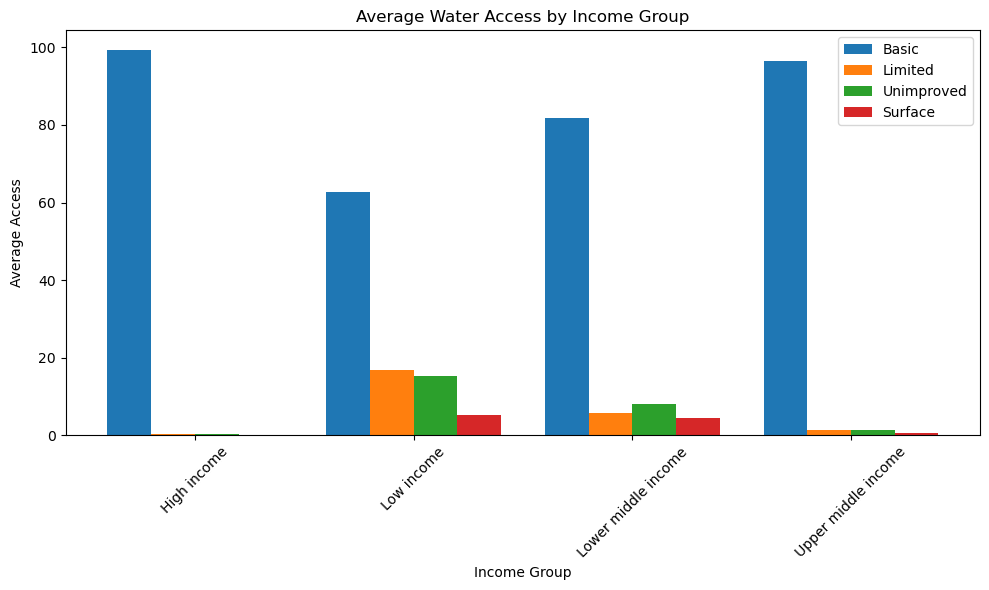

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(multiple_averagge_water_access))

width = 0.2

bars1 = ax.bar(x - 1.5*width, multiple_averagge_water_access['wat_bas_n'], width, label='Basic')
bars2 = ax.bar(x - 0.5*width, multiple_averagge_water_access['wat_lim_n'], width, label='Limited')
bars3 = ax.bar(x + 0.5*width, multiple_averagge_water_access['wat_unimp_n'], width, label='Unimproved')
bars4 = ax.bar(x + 1.5*width, multiple_averagge_water_access['wat_sur_n'], width, label='Surface')


ax.set_xlabel('Income Group')
ax.set_ylabel('Average Access')
ax.set_title('Average Water Access by Income Group')
ax.set_xticks(x)
ax.set_xticklabels(multiple_averagge_water_access.index)
ax.legend()


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

             
             

* Calculate urban-rural access gaps

* Find countries with largest inequalities

In [26]:
# Sorting cities by basic water access (best to worst)
df_sorted = df_cleaned.sort_values('wat_bas_n', ascending=False)

# Getting top 10 cities with best water access
best_countries = df_sorted.head(10)

# Getting bottom 10 cities with worst water access
worst_countries = df_sorted.tail(10)

# Displaying results
print("10 Best Countries for Basic Water Access:")
print("=" * 50)
for index, row in best_countries.iterrows():
    print(f"{row['name']} ({row['income_group']} income): {row['wat_bas_n']:.1f}%")

print("\n10 Worst Countries for Basic Water Access:")
print("=" * 50)
for index, row in worst_countries.iterrows():
    print(f"{row['name']} ({row['income_group']} income): {row['wat_bas_n']:.1f}%")


10 Best Cities for Basic Water Access:
Andorra (High income income): 100.0%
Finland (High income income): 100.0%
Switzerland (High income income): 100.0%
Greece (High income income): 100.0%
Germany (High income income): 100.0%
Greenland (High income income): 100.0%
New Zealand (High income income): 100.0%
Denmark (High income income): 100.0%
Malta (High income income): 100.0%
Turkmenistan (Upper middle income income): 100.0%

10 Worst Cities for Basic Water Access:
Uganda (Low income income): 55.9%
Madagascar (Low income income): 53.4%
Ethiopia (Low income income): 49.6%
Burkina Faso (Low income income): 47.2%
Niger (Low income income): 46.9%
Chad (Low income income): 46.2%
Democratic Republic of the Congo (Lower middle income income): 46.0%
Papua New Guinea (Lower middle income income): 45.3%
South Sudan (Low income income): 41.0%
Central African Republic (Low income income): 37.2%


In [27]:

best_income_counts = best_countries['income_group'].value_counts()
print("Income distribution among 10 best Countries:")
print(best_income_counts)


worst_income_counts = worst_countries['income_group'].value_counts()
print("\nIncome distribution among 10 worst citiesCountries
print(worst_income_counts)


print("\nPercentage distribution among best cities:")
best_percentages = best_income_counts / len(best_countries) * 100
print(best_percentages)

print("\nPercentage distribution among worst cities:")
worst_percentages = worst_countries['income_group'].value_counts() / len(worst_countries) * 100
print(worst_percentages)


Income distribution among 10 best cities:
income_group
High income            9
Upper middle income    1
Name: count, dtype: int64

Income distribution among 10 worst cities:
income_group
Low income             8
Lower middle income    2
Name: count, dtype: int64

Percentage distribution among best cities:
income_group
High income            90.0
Upper middle income    10.0
Name: count, dtype: float64

Percentage distribution among worst cities:
income_group
Low income             80.0
Lower middle income    20.0
Name: count, dtype: float64


* Create scatter plot: Population vs Water Access

* Identify outliers (large populations with good access, small populations with poor access)



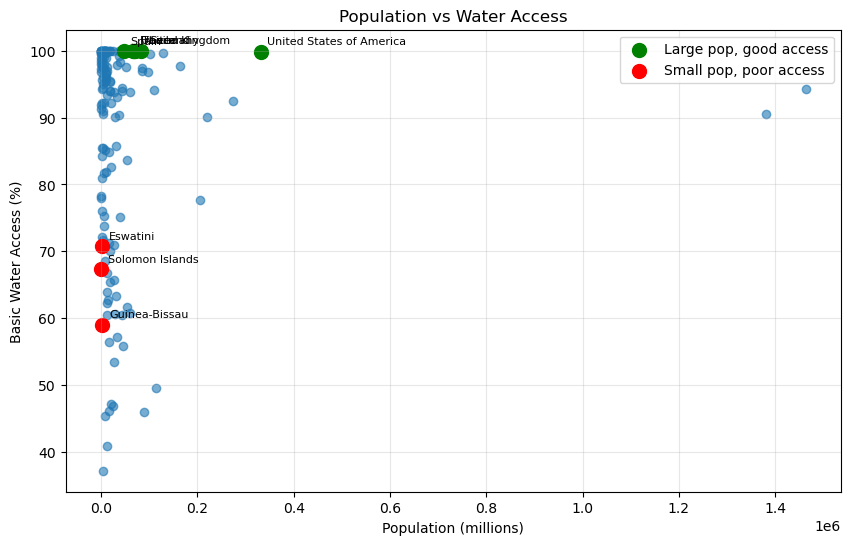

Large countries with good water access:
  Spain (High income): 46754.8M people, 99.9% access
  France (High income): 65273.5M people, 100.0% access
  United Kingdom (High income): 67886.0M people, 100.0% access
  Thailand (Upper middle income): 69800.0M people, 100.0% access
  Germany (High income): 83783.9M people, 100.0% access
  United States of America (High income): 331002.7M people, 99.9% access

Small countries with poor water access:
  Solomon Islands (Lower middle income): 686.9M people, 67.3% access
  Eswatini (Lower middle income): 1160.2M people, 70.8% access
  Guinea-Bissau (Low income): 1968.0M people, 59.0% access


In [29]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_cleaned['pop_n'], df_cleaned['wat_bas_n'], alpha=0.6)


plt.xlabel('Population (millions)')
plt.ylabel('Basic Water Access (%)')
plt.title('Population vs Water Access')

# Identifing outliers

large_pop_threshold = df_cleaned['pop_n'].quantile(0.8)  # Top 20% by population
small_pop_threshold = df_cleaned['pop_n'].quantile(0.2)  # Bottom 20% by population
good_access_threshold = df_cleaned['wat_bas_n'].quantile(0.8)  # Top 20% by access
poor_access_threshold = df_cleaned['wat_bas_n'].quantile(0.2)  # Bottom 20% by access

# Finding outlier 
large_good = df_cleaned[(df_cleaned['pop_n'] > large_pop_threshold) & (df_cleaned['wat_bas_n'] > good_access_threshold)]
small_poor = df_cleaned[(df_cleaned['pop_n'] < small_pop_threshold) & (df_cleaned['wat_bas_n'] < poor_access_threshold)]

# Highlighting outliers on the plot
plt.scatter(large_good['pop_n'], large_good['wat_bas_n'], color='green', s=100, label='Large pop, good access')
plt.scatter(small_poor['pop_n'], small_poor['wat_bas_n'], color='red', s=100, label='Small pop, poor access')


for index, row in large_good.iterrows():
    plt.annotate(row['name'], (row['pop_n'], row['wat_bas_n']), xytext=(5, 5), 
                textcoords='offset points', fontsize=8)

for index, row in small_poor.iterrows():
    plt.annotate(row['name'], (row['pop_n'], row['wat_bas_n']), xytext=(5, 5), 
                textcoords='offset points', fontsize=8)


plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


print("Large countries with good water access:")
for index, row in large_good.iterrows():
    print(f"  {row['name']} ({row['income_group']}): {row['pop_n']:.1f}M people, {row['wat_bas_n']:.1f}% access")

print("\nSmall countries with poor water access:")
for index, row in small_poor.iterrows():
    print(f"  {row['name']} ({row['income_group']}): {row['pop_n']:.1f}M people, {row['wat_bas_n']:.1f}% access")
